# The Spark Foundation 'GRIPDECEMBER22' Internship

# TASK 03: Exploratory Data Analysis: Retail

# Objective
- ### Perform 'Exploratory Data Analysis' on dataset of 'SampleSuperstore' 
- ### As a Business Manager, task is to find out weak areas where we can work to make more profit. 

## Requirements:
- ### Language: Python
- ### IDE: Jupyter Notebook
- ### Dataset: https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

# Content
- ### Import Dependencies
- ### Read dataset
- ### Visualization
- ### Feature Engineering
- ### Conclusion

### NOTE: Observations are added in between the visuals

## 1] Import Dependencies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import plotly.graph_objects as go
import us 

# filtering warnings
import warnings 
warnings.filterwarnings('ignore')

## 2]  Read Dataset

In [18]:
# Reading the dataset top 5 rows
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [19]:
# Reading the dataset bottom 5 rows
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [20]:
print('Shape of the raw Dataset is', data.shape)

Shape of the raw Dataset is (9994, 13)


In [21]:
# checking the duplicate rows
data[data.duplicated()].shape

(17, 13)

- ### Dataset has 17 duplicate rows

In [22]:
# Drop duplicate rows

store = data.drop_duplicates()
print('Shape of cleaned Store Dataset', store.shape)

Shape of cleaned Store Dataset (9977, 13)


In [23]:
print('There are {} columns in our Dataset \n'.format(len(store.columns)))
pd.DataFrame(store.columns)

There are 13 columns in our Dataset 



,0
0,Ship Mode
1,Segment
2,Country
3,City
4,State
5,Postal Code
6,Region
7,Category
8,Sub-Category
9,Sales


In [24]:
# checking data type of each column
store.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### Store dataset have 
- #### 8 columns with object dtype  
- #### 2 columns with int64 dtype
- #### 3 columns with float64 dtype

In [25]:
# checking for any null value in dataset
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- ### There is no null value in the Dataset

In [26]:
# checking the summary of our dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


## Description of Dataset

In [27]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9977.0,55154.964117,32058.266816,1040.000,23223.0000,55901.000,90008.000,99301.000
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.970,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.200,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.372,8399.976


In [28]:
store.describe(include=['object']).T

,count,unique,top,freq
Ship Mode,9977,4,Standard Class,5955
Segment,9977,3,Consumer,5183
Country,9977,1,United States,9977
City,9977,531,New York City,914
State,9977,49,California,1996
Region,9977,4,West,3193
Category,9977,3,Office Supplies,6012
Sub-Category,9977,17,Binders,1522


In [29]:
#numerical columns in data 

num =[data for data in store.columns if store[data].dtypes != 'object']
print('There are {} numerical columns \n'.format(len(num)))
pd.DataFrame(num)

There are 5 numerical columns 



,0
0,Postal Code
1,Sales
2,Quantity
3,Discount
4,Profit


In [30]:
#categorical columns in data 

categorical = [var for var in store.columns if store[var].dtype=='O']

print('There are {} categorical columns:\n'.format(len(categorical)))
pd.DataFrame(categorical)

There are 8 categorical columns:



,0
0,Ship Mode
1,Segment
2,Country
3,City
4,State
5,Region
6,Category
7,Sub-Category


In [31]:
#Finding unique values in each categorical column
print('Class in each categorical column are:')

col = [col for col in store.columns if store[col].dtype=='O']
store[col].apply(lambda row :row.unique())

Class in each categorical column are:


Ship Mode       [Second Class, Standard Class, First Class, Sa...
Segment                        [Consumer, Corporate, Home Office]
Country                                           [United States]
City            [Henderson, Los Angeles, Fort Lauderdale, Conc...
State           [Kentucky, California, Florida, North Carolina...
Region                               [South, West, Central, East]
Category                 [Furniture, Office Supplies, Technology]
Sub-Category    [Bookcases, Chairs, Labels, Tables, Storage, F...
dtype: object

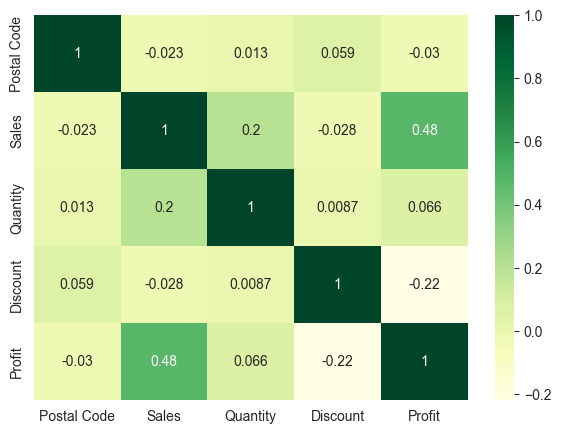

In [32]:
# The correlation between numerical columns

plt.figure(figsize=(7,5),dpi=100)
sns.heatmap(store.corr(), annot = True, cmap="YlGn")
plt.show()

- ### There is no correlation between numerical columns , they are indepedent of eachother

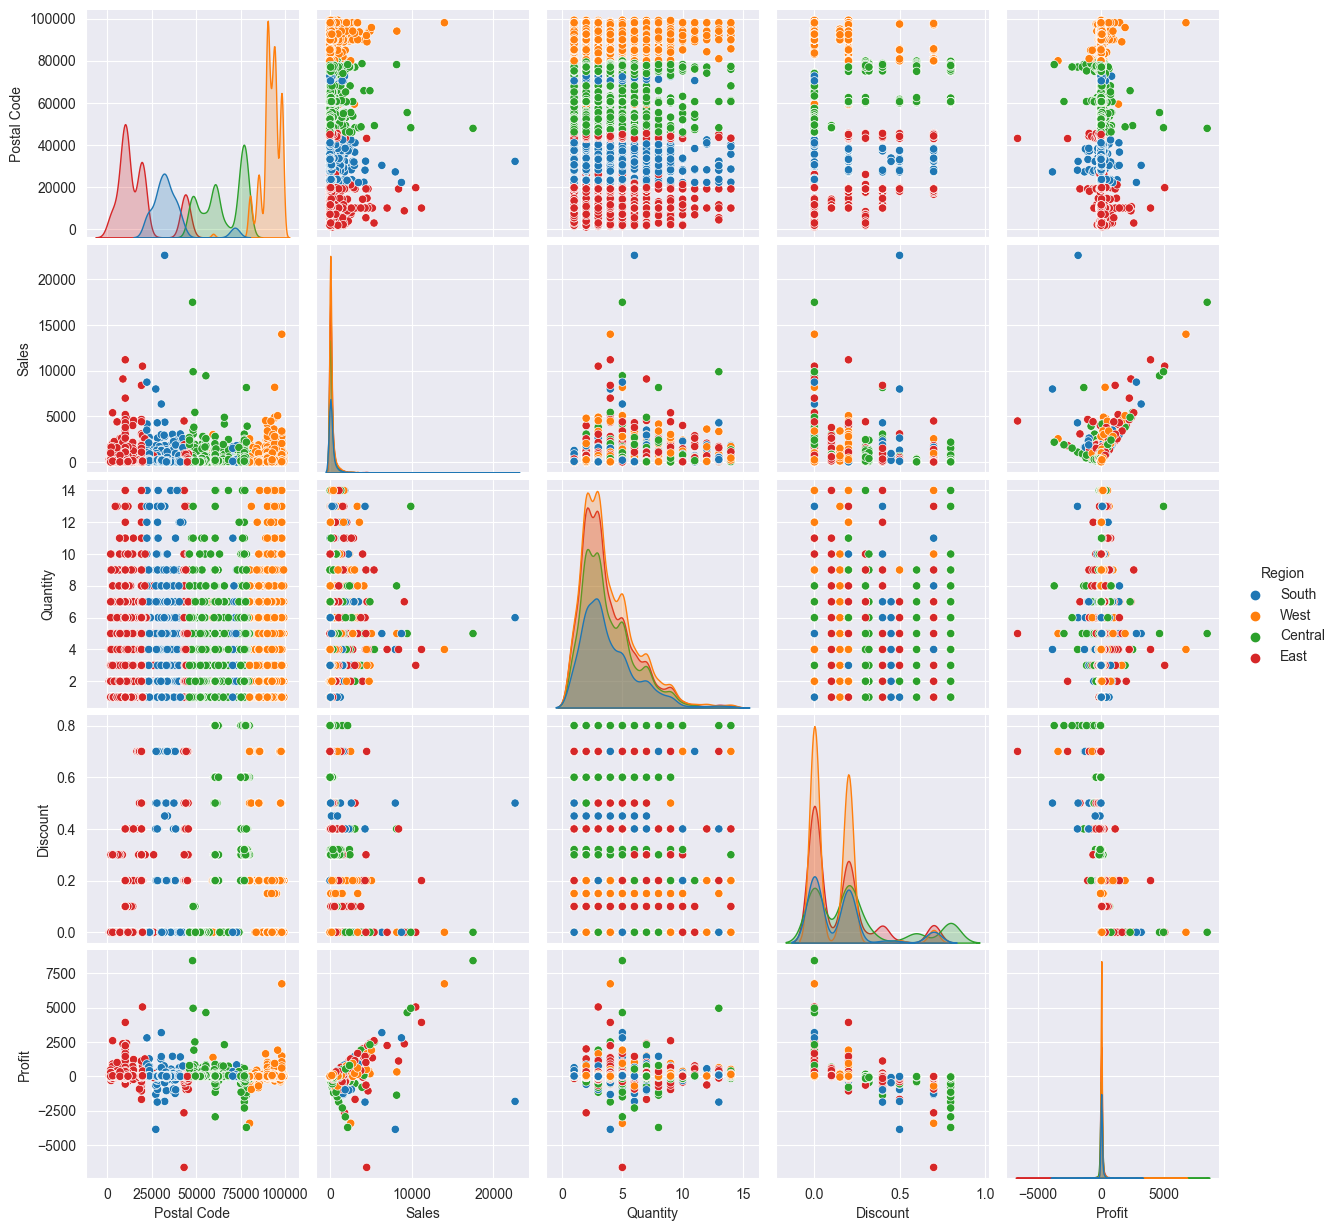

In [33]:
# visualizing the dataset by pair plot
sns.pairplot(data = store, hue = 'Region')
plt.show()

# 3] Feature Engineering and Visualization 

## Category of Product 

In [51]:
fig = go.Figure(go.Pie(labels = store['Category'].value_counts().index, 
                       values = store['Category'].value_counts(),
                       hole = 0.25))
fig.show()

## Observation:
- ### Office Supplies being highly sold
- ### Technology products sale being low compared to other

## Sub-Category of Products 

### Taking Gross Margin
- ### Gross Margin = (Profit / Sales)*100

In [35]:
# considering Gross margin on sub categorical products
sub = data[['Sub-Category','Quantity','Sales','Discount','Profit']].groupby(by='Sub-Category').sum()
sub['Gross margin'] = sub.Profit*100/sub.Sales
sub.head()

,Quantity,Sales,Discount,Profit,Gross margin
Sub-Category,,,,,
Accessories,2976,167380.3180,60.80,41936.6357,25.054700
Appliances,1729,107532.1610,77.60,18138.0054,16.867517
Art,3000,27118.7920,59.60,6527.7870,24.071083
Binders,5974,203412.7330,567.00,30221.7633,14.857361
Bookcases,868,114879.9963,48.14,-3472.5560,-3.022768


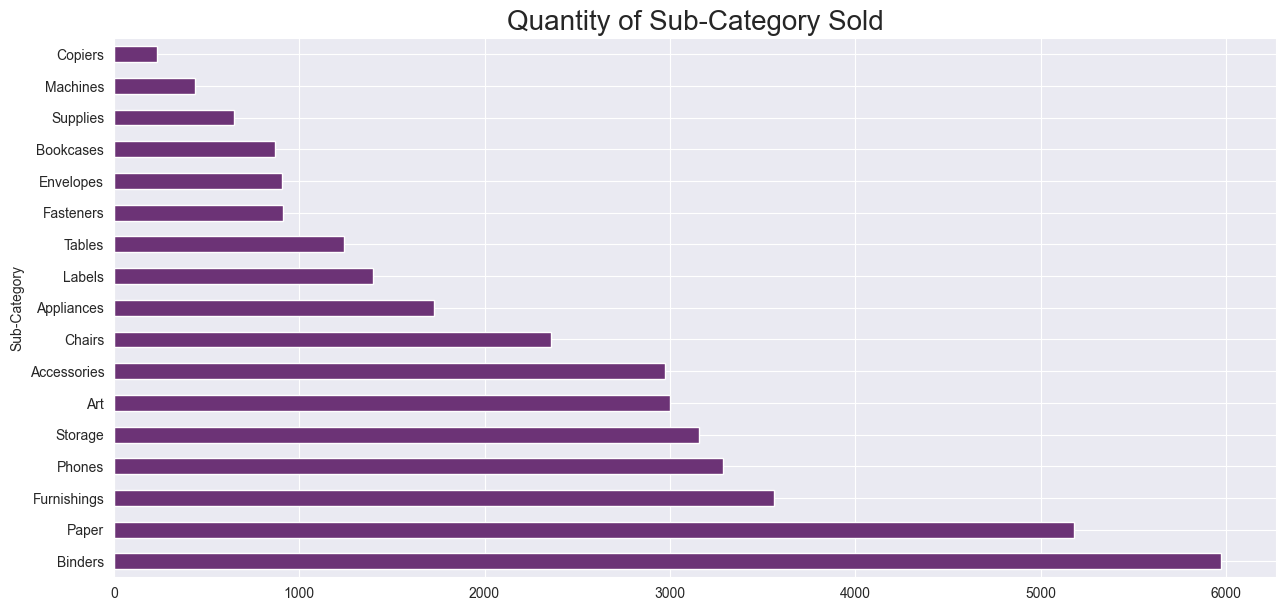

In [36]:
sub.sort_values(by='Quantity',
              ascending=False)['Quantity'].plot(kind='barh',  color="#6c3376", figsize=(15,7))

plt.title("Quantity of Sub-Category Sold", fontsize =20)
plt.show()

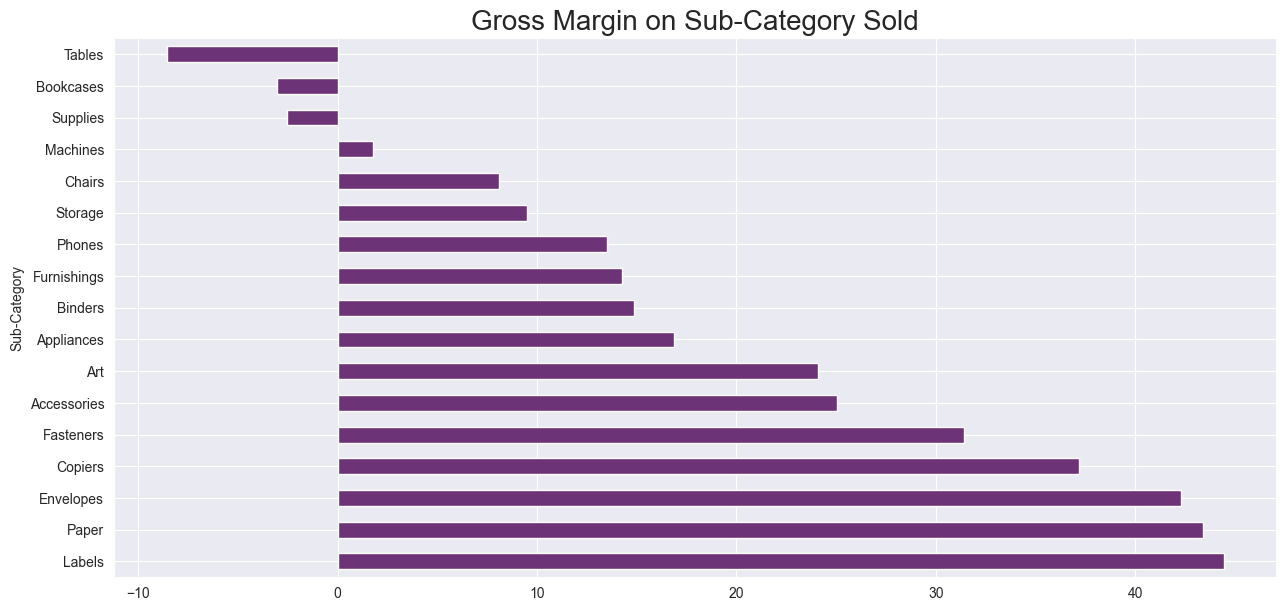

In [37]:
sub.sort_values(by='Gross margin',
              ascending=False)['Gross margin'].plot(kind='barh',  color="#6c3376", figsize=(15,7))

plt.title("Gross Margin on Sub-Category Sold", fontsize =20)
plt.show()

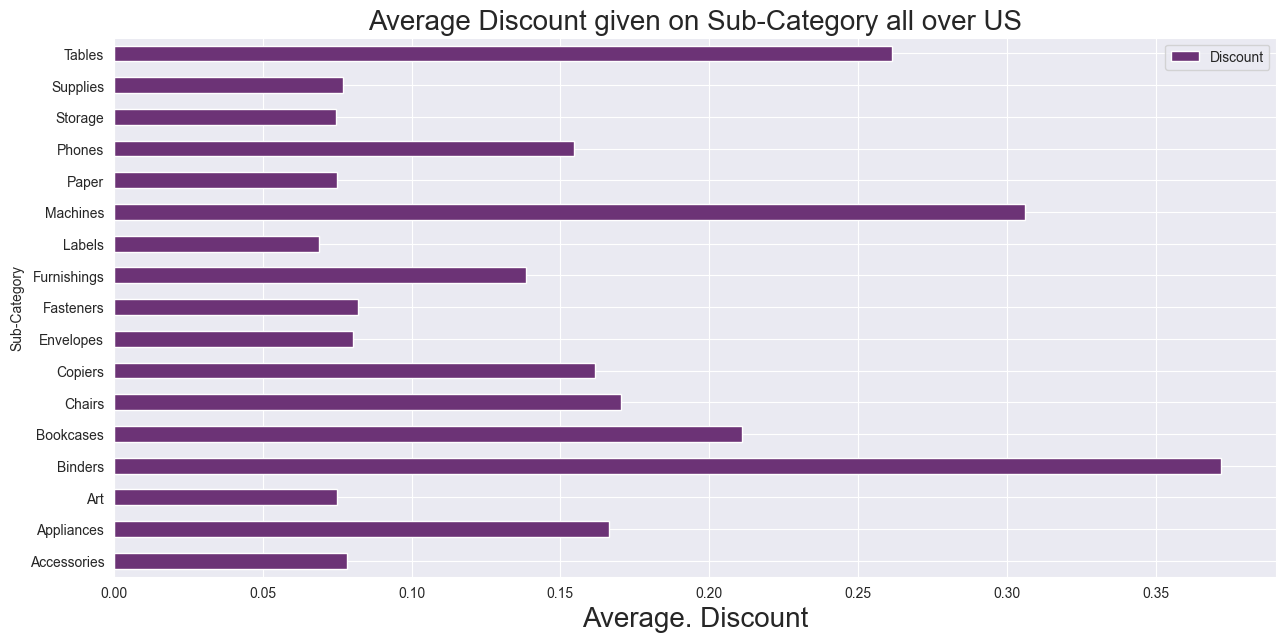

In [38]:
aveDisc= store[['Sub-Category','Discount']].groupby(by='Sub-Category')
aveDisc.mean().plot.barh(figsize=(15,7), color="#6c3376")                                  
                                                    
plt.title('Average Discount given on Sub-Category all over US', fontsize =20)
plt.xlabel('Average. Discount', fontsize ='20')
plt.show()

## Observation:
- ### Labels, Paper, Envelopes, Copiers, Fasteners are highly profitable sub-categories.
- ### Products like Tables, Supplies and Bookcases are loss making sub-categories.
- ### Huge discount is given on Binders, Machines, Tables
- ### Huge quantity is procued in Binders, Papers, Envelopes

# Segment of Customer 

In [52]:
fig = go.Figure(go.Pie(labels = store['Segment'].value_counts().index, 
                       values = store['Segment'].value_counts(),
                       hole = 0.25))
fig.show()

# Sales and Profit by each Segment

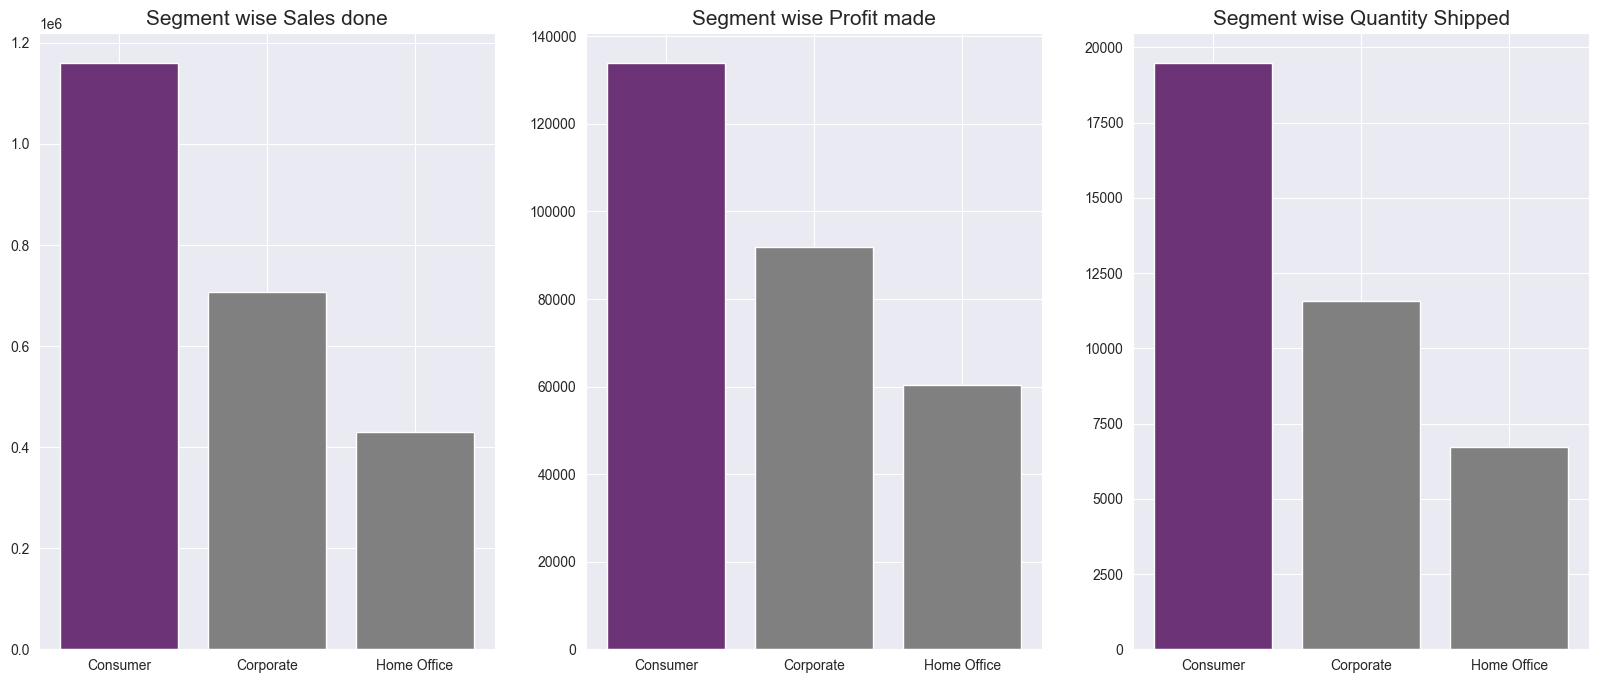

In [40]:
segSales = store.groupby(by = 'Segment')['Sales'].sum()

segProfit = store.groupby(by = 'Segment')['Profit'].sum()

segQuantity = store.groupby(by = 'Segment')['Quantity'].sum()


fig, (a1,a2, a3) = plt.subplots(1,3,figsize=(20,8))

a1.bar(store['Segment'].unique(), segSales, color = ["#6c3376", 'grey', 'grey'])
a1.set_title('Segment wise Sales done', fontsize =15)

a2.bar(store['Segment'].unique(), segProfit, color=  ["#6c3376", 'grey', 'grey'])
a2.set_title('Segment wise Profit made', fontsize =15)

a3.bar(store['Segment'].unique(), segQuantity, color=  ["#6c3376", 'grey', 'grey'])
a3.set_title('Segment wise Quantity Shipped', fontsize =15)

plt.show()

## Observation:
- ### _Consumer Segment_ being highest as 52% and _Home office_ Segment being less compared to other two.
- ### _Consumer Segment_ does more sales, is most profitable and get shipped more in quantity as compared to other segments.
- ### Hence, Marketing strategy has to target or place more focus on retaining _Consumer_ and _Corporate Segment_ customers
- ### _Home Offices_ needs to be increased.

# Shipping Mode used by Customers

In [53]:
fig = go.Figure(go.Pie(labels = store['Ship Mode'].value_counts().index, 
                       values = store['Ship Mode'].value_counts(),
                       hole = 0.25))
fig.show()

# Observing Ship Mode by Nominal Price 
 - Nominal Price = Net Sales/ 1- Discount

In [42]:
nominal = store[['Sub-Category','Ship Mode','Sales','Discount','Profit','Quantity']]

nominal['Nominal Price'] = store.Sales/(1-store.Discount)
nominal.head()

,Sub-Category,Ship Mode,Sales,Discount,Profit,Quantity,Nominal Price
0,Bookcases,Second Class,261.9600,0.00,41.9136,2,261.96
1,Chairs,Second Class,731.9400,0.00,219.5820,3,731.94
2,Labels,Second Class,14.6200,0.00,6.8714,2,14.62
3,Tables,Standard Class,957.5775,0.45,-383.0310,5,1741.05
4,Storage,Standard Class,22.3680,0.20,2.5164,2,27.96


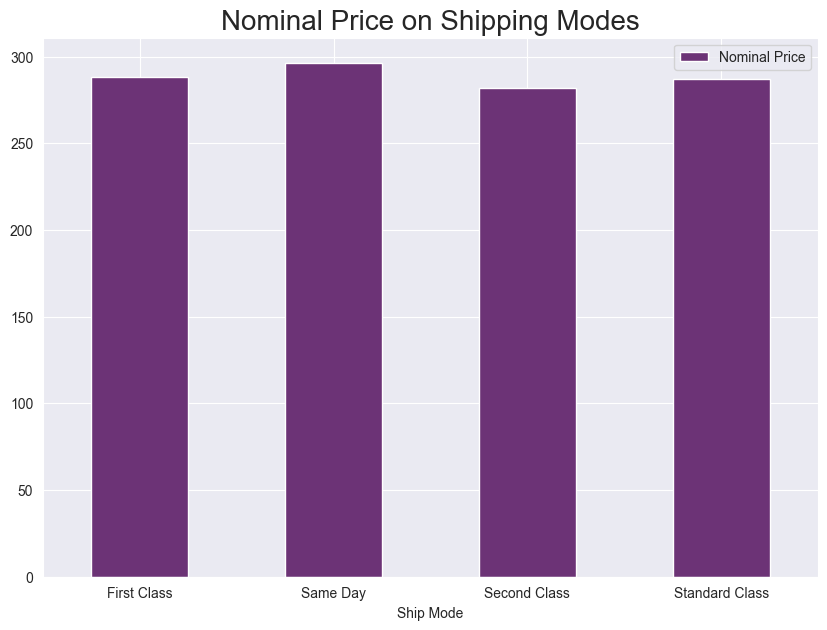

In [43]:
nominal[['Ship Mode','Nominal Price']].groupby(by='Ship Mode').mean().plot.bar(figsize=(10,7), color = "#6c3376")

plt.title('Nominal Price on Shipping Modes', fontsize =20)
plt.xticks(rotation =0)
plt.show()

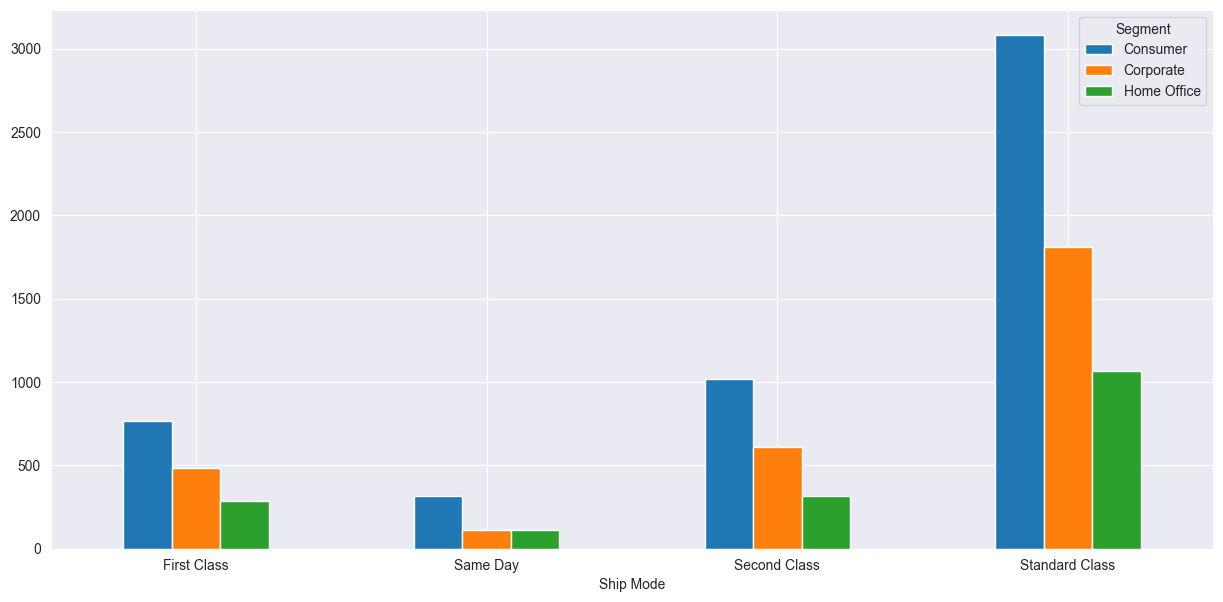

In [44]:
store.groupby(by='Ship Mode')['Segment'].value_counts().unstack().plot(kind='bar',
                   stacked=False,
                   figsize=(15,7))
plt.xticks(rotation=0)
plt.show()

## Observation:
- ### Delivery by _Standard Class_ Ship Mode being highest as 60 % that means Customers used Standard Class mostly for their Product delivery.
- ### All segment products were delievered highly by Standard shipping mode
- ### Delivery on _Same day_ was done very less compared to other modes that means Customers rarely expected delivery of their product on same day.
- ### It is obseerved that Nominal price is equivalent for all shipping modes

# Region wise Category Sales and Profit 

In [54]:
# understanding sales done in all four regions
salesByRegion = store[['Region','Sales']].groupby(by='Region').mean()

fig = go.Figure(go.Pie(labels = salesByRegion.index, 
                       values = salesByRegion.values.ravel(),
                       hole = 0.2))
fig.show()

In [55]:
quantByRegion = store[['Region','Quantity']].groupby(by='Region').mean()
fig = go.Figure(go.Pie(labels = quantByRegion.index, 
                       values = quantByRegion.values.ravel(),
                       hole = 0.2))
fig.show()

In [56]:
profitByRegion = store[['Region','Profit']].groupby(by='Region').mean()
fig = go.Figure(go.Pie(labels = profitByRegion.index, 
                       values = profitByRegion.values.ravel(),
                       hole = 0.2))
fig.show()

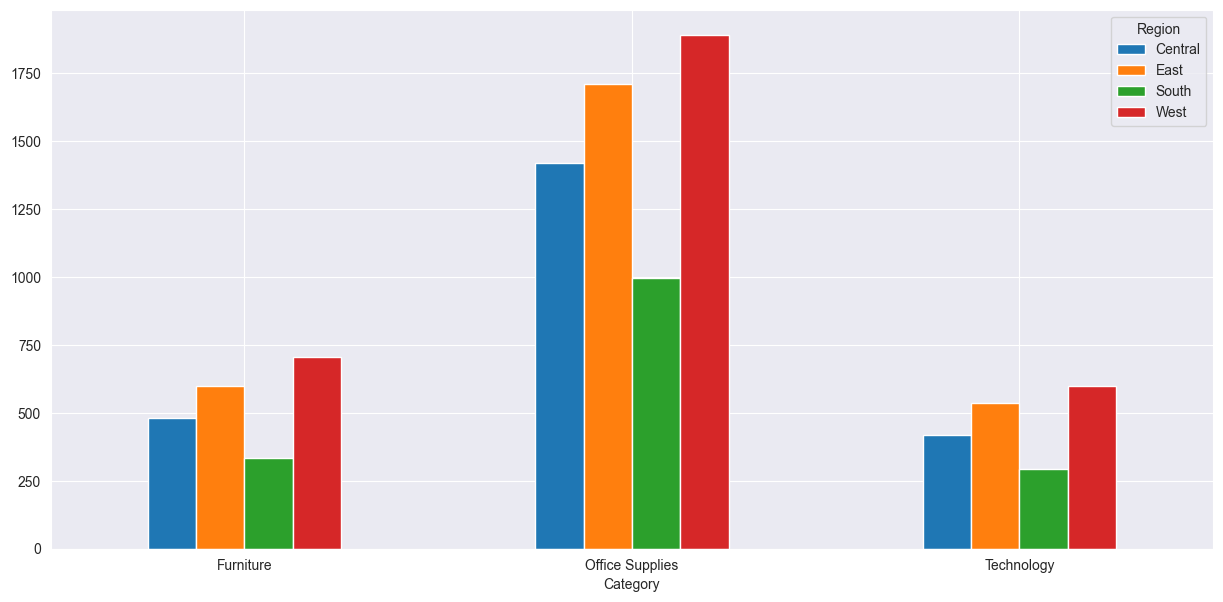

In [48]:
#understanding frequency of products sold in all regions
new  = store.groupby(by ='Category')['Region'].value_counts()

new.unstack().plot(kind='bar',
                   stacked=False,
                   figsize=(15,7))
plt.xticks(rotation=0)
plt.show()

## Observation: 
- ### East and South regions of United States does more sales
- ### East and West regions of United States are more profitable

# City wise Sales 

# Top and Bottom cities that did highest Sales

In [49]:
salesByCity = pd.DataFrame(store.groupby(['City'])['Sales', 'Profit', 'Quantity'].sum().sort_values('Sales',ascending = False))
salesByCity.head(10)

,Sales,Profit,Quantity
City,,,
New York City,256319.0410,62013.8973,3413
Los Angeles,175831.9010,30431.4267,2876
Seattle,119460.2820,29121.6825,1578
San Francisco,112577.1720,17466.1186,1920
Philadelphia,109061.4610,-13843.2106,1978
Houston,64441.2564,-10175.1755,1460
Chicago,48535.9770,-6648.3318,1129
San Diego,47521.0290,6377.1960,670
Jacksonville,44713.1830,-2323.8350,429


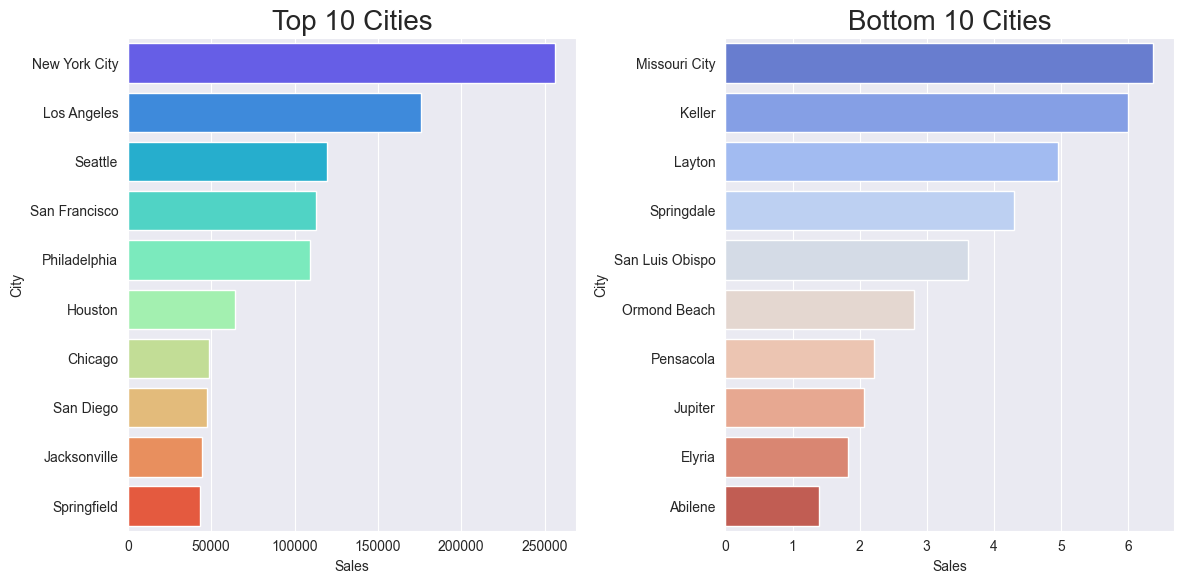

In [50]:
top = salesByCity[:10]
bottom = salesByCity[-10:]

figure, axis = plt.subplots(1,2, figsize=(12, 6))
sns.set_theme(style="whitegrid")


top10 = sns.barplot(data = top, y = top.index, x = top.Sales, palette = "rainbow", ax = axis[0])
top10.set_yticklabels(top10.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10 = sns.barplot(data = bottom, y = bottom.index, x = bottom.Sales, palette = "coolwarm", ax=axis[1])
bottom10.set_yticklabels(bottom10.get_yticklabels(),size = 10)
top10.set_title('Top 10 Cities', fontsize = 20)
bottom10.set_title('Bottom 10 Cities', fontsize = 20)

# Set spacing between subplots
figure.tight_layout()
plt.show()

### Observation:
- ### There is a huge disparity between the cities with highest sales and lowest sales.

# Conclusion:
- #### Sales of Tables and BookCases must be minimized in North Carolina, Tennesse, Arizona and Colorado because they result in Loss.
- #### Supply of Tables and BookCases result in overloss loss so their supply should be minimized.
- #### Maximum profit is seen in sales to the states of California, Los Angeles and Seattle.	
- #### Central region needs to focus on profit and sales as compared to other regions.
- #### Considering total sales, it seems that people tend to buy more things when it is selling at a discounted price. 
- #### Hence, Superstore is incurring losses due to giving discounts on its product.
- #### By incurring small losses, the company gains in the future by attracting more long term customers. 
- #### Therefore, the small losses from discounts are an essential part of company's business.